# Desafios
Desafios da aula 3 da imersão de dados da Alura
Bibliotecas e dados necessários:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression='zip') 
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4

## Desafio 01
criar tabelas de frequência com o Pandas e o método groupby

In [ ]:
dados.groupby(by=['dose', 'tempo']).count()

id  tratamento  composto   g-0  ...  c-96  c-97  c-98  c-99
dose tempo                                    ...                        
D1   24     3886        3886      3886  3886  ...  3886  3886  3886  3886
     48     4354        4354      4354  4354  ...  4354  4354  4354  4354
     72     3907        3907      3907  3907  ...  3907  3907  3907  3907
D2   24     3886        3886      3886  3886  ...  3886  3886  3886  3886
     48     3896        3896      3896  3896  ...  3896  3896  3896  3896
     72     3885        3885      3885  3885  ...  3885  3885  3885  3885

[6 rows x 875 columns]

In [ ]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).count()

id  composto   g-0   g-1  ...  c-96  c-97  c-98  c-99
dose tempo tratamento                                ...                        
D1   24    com_controle   301       301   301   301  ...   301   301   301   301
           com_droga     3585      3585  3585  3585  ...  3585  3585  3585  3585
     48    com_controle   343       343   343   343  ...   343   343   343   343
           com_droga     4011      4011  4011  4011  ...  4011  4011  4011  4011
     72    com_controle   307       307   307   307  ...   307   307   307   307
           com_droga     3600      3600  3600  3600  ...  3600  3600  3600  3600
D2   24    com_controle   305       305   305   305  ...   305   305   305   305
           com_droga     3581      3581  3581  3581  ...  3581  3581  3581  3581
     48    com_controle   305       305   305   305  ...   305   305   305   305
           com_droga     3591      3591  3591  3591  ...  3591  3591  3591  3591
     72    com_controle   305       305   305   305  ...   305   305   305   305
           com_droga     3580      3580  3580  3580  ...  3580  3580  3580  3580

[12 rows x 874 columns]

In [ ]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).mean()

g-0       g-1  ...      c-98      c-99
dose tempo tratamento                        ...                    
D1   24    com_controle -0.251760 -0.453322  ...  0.350566  0.342308
           com_droga     0.367996 -0.170839  ... -0.340809 -0.216371
     48    com_controle -0.122773 -0.453638  ...  0.408657  0.450673
           com_droga     0.412469 -0.142581  ... -0.634006 -0.389838
     72    com_controle -0.295271 -0.669059  ...  0.379652  0.319684
           com_droga     0.286250 -0.127878  ... -0.835132 -0.588545
D2   24    com_controle  0.010754 -0.229451  ...  0.134107  0.112021
           com_droga     0.115253 -0.081764  ... -0.254499 -0.187848
     48    com_controle  0.013174  0.001737  ...  0.232461  0.169539
           com_droga     0.214480 -0.001143  ... -0.485368 -0.317882
     72    com_controle  0.070250  0.133537  ...  0.200942  0.165440
           com_droga     0.253439  0.052840  ... -0.644784 -0.391018

[12 rows x 872 columns]

In [ ]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).size()

dose  tempo  tratamento  
D1    24     com_controle     301
             com_droga       3585
      48     com_controle     343
             com_droga       4011
      72     com_controle     307
             com_droga       3600
D2    24     com_controle     305
             com_droga       3581
      48     com_controle     305
             com_droga       3591
      72     com_controle     305
             com_droga       3580
dtype: int64

In [ ]:
dados.groupby(by=['dose', 'tempo']).size()

dose  tempo
D1    24       3886
      48       4354
      72       3907
D2    24       3886
      48       3896
      72       3885
dtype: int64

## Desafio 02:
Normalizar pela coluna


In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [ ]:
pd.crosstab(dados['dose'], dados['tempo'], normalize='columns') 

tempo,24,48,72
dose,,,
D1,0.5,0.527758,0.501412
D2,0.5,0.472242,0.498588


In [ ]:
pd.crosstab(dados['tempo'], dados['tratamento'], normalize='columns') 

tratamento,com_controle,com_droga
tempo,,
24,0.324759,0.326499
48,0.347267,0.346364
72,0.327974,0.327137


## Desafio 03
Explorar outros agregadores

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='var')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.564594   2.137311
     48         0.728284   2.869308
     72         0.591814   2.127514
D2   24         0.699943   1.092022
     48         0.700310   1.730477
     72         0.770956   2.106944

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='sem')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.043310   0.024417
     48         0.046079   0.026746
     72         0.043906   0.024310
D2   24         0.047905   0.017463
     48         0.047918   0.021952
     72         0.050276   0.024260

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='first')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.1636     1.0620
     48          -0.6696     0.6280
     72          -0.6723     0.0743
D2   24          -1.3200     2.0440
     48           0.4860    -0.0630
     72           0.7344    -0.3254

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='last')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           0.0465     0.6660
     48           1.1120     0.1420
     72          -0.6204    -0.8598
D2   24           0.7200    -1.3260
     48           0.3942    -0.1150
     72          -0.1051    -0.4330

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

## Desafio 04:
Explorar o melt()

In [ ]:
pd.melt(dados, id_vars=['dose'], value_vars=['tempo'])

,dose,variable,value
0,D1,tempo,24
1,D1,tempo,72
2,D1,tempo,48
3,D1,tempo,48
4,D2,tempo,72
...,...,...,...
23809,D2,tempo,24
23810,D2,tempo,24
23811,D2,tempo,48
23812,D1,tempo,24


In [ ]:
pd.melt(dados, id_vars=['dose'], value_vars=['g-0'])

,dose,variable,value
0,D1,g-0,1.0620
1,D1,g-0,0.0743
2,D1,g-0,0.6280
3,D1,g-0,-0.5138
4,D2,g-0,-0.3254
...,...,...,...
23809,D2,g-0,0.1394
23810,D2,g-0,-1.3260
23811,D2,g-0,0.3942
23812,D1,g-0,0.6660


In [ ]:
pd.melt(dados, id_vars=['tratamento'], value_vars=['g-0'])

,tratamento,variable,value
0,com_droga,g-0,1.0620
1,com_droga,g-0,0.0743
2,com_droga,g-0,0.6280
3,com_droga,g-0,-0.5138
4,com_droga,g-0,-0.3254
...,...,...,...
23809,com_droga,g-0,0.1394
23810,com_droga,g-0,-1.3260
23811,com_controle,g-0,0.3942
23812,com_droga,g-0,0.6660


## Desafio 05:
Calcular e analisar a correlação entre G e C (expressões gênicas e tipos celulares). Refletir sobre os efeitos biológicos

In [ ]:
corr_total = dados.loc[:]

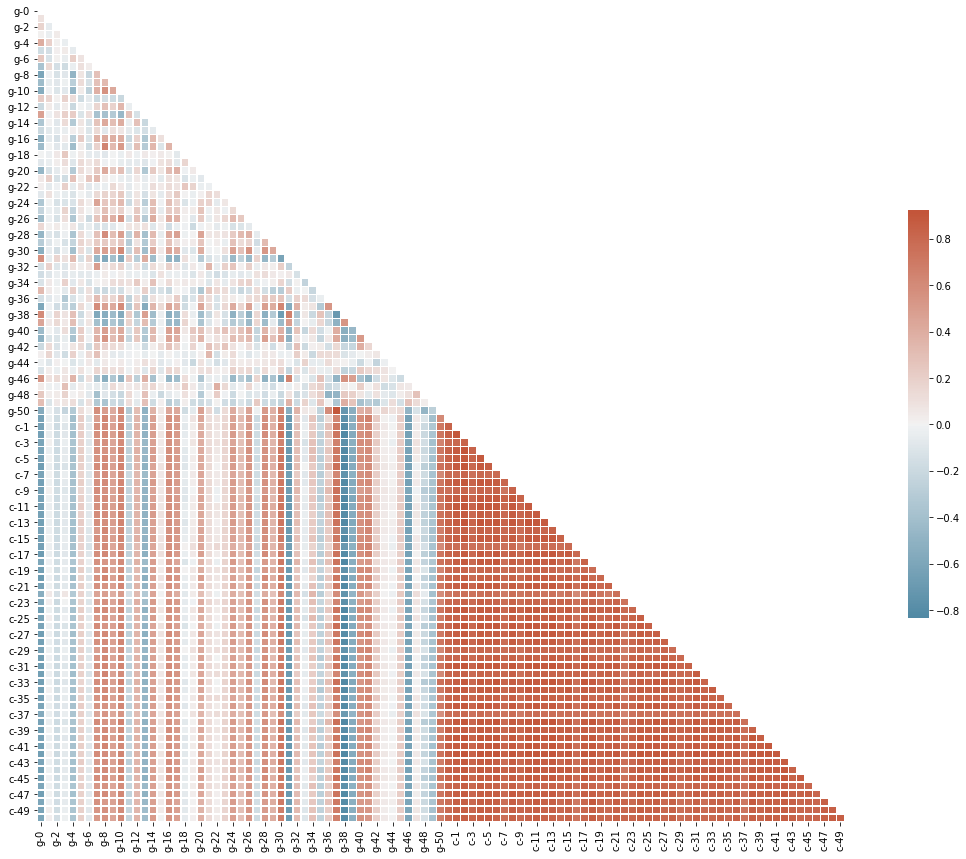

In [ ]:
# criar uma cópia do df original
dados_desafio_5 = dados.copy()

# armazena a lista das colunas de g-51 a g-771 
colunas_a_remover = list(dados_desafio_5.columns.to_series()['g-51':'g-771'])

# executa a remoção das colunas armazenadas anteriormente
dados_desafio_5 = dados_desafio_5.drop(colunas_a_remover, axis=1)

# executa o último slice, considerando as 50 colunas de G e 50 colunas de C
dados_desafio_5 = dados_desafio_5.loc[:,'g-0':'c-50']

corr_celular = dados_desafio_5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A expressão de alguns genes, como g-7 e g-8, possuem uma correlação muito mais alta com os conjuntos celulares do que outros. 

## Desafio 06:
Estudar o código que plota a matriz de correlação (heatmap)


In [ ]:
corr = dados.loc[:, 'g-0':'g-50'].corr()

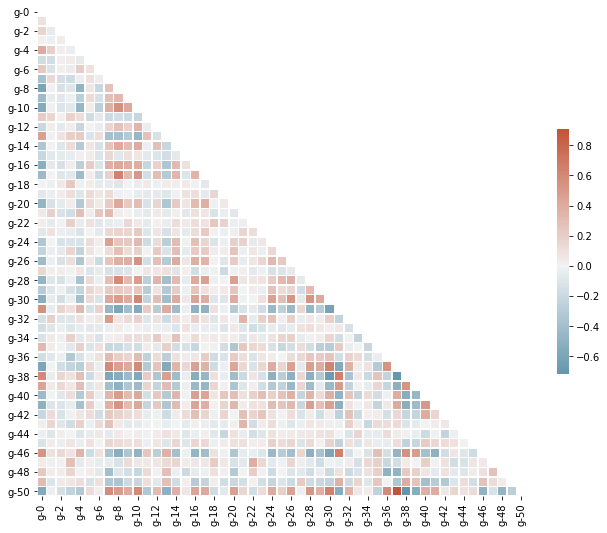

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} )

A variável mask é feita a partir do método triu do numpy, que pega o triângulo superior (Upper TRIangle) do array retornado pelo ones_like (metodo do numpy que retorna 0 e 1 )  
f e ax dão o tamanho do heat map  
cmap é a paleta de cor utilizada, feita com o metodo diverging_palette do Seaborn - 230 é a primeira cor - o azul - e 20 é a segunda cor do espectro - o vermelho  
O metodo heatmap do seaborn precisa de: o dataframe, uma mascara para retirar metade, um cmap para a paleta de cores da correlação, o centro, um formato, um tamanho de linha e um mapeamento

## Desafio 07:
Resumir o que você aprendeu 

Com essas análises, eu aprendi as questões de correlação entre variáveis e como isso pode afetar os estudos, seus problemas e desafios. Também aprendi a ver a variação entre os números de um determinado tipo de dados e como representar isso em um gráfico de pontos